## CREDIT CARD FRAUD DETECTION.

In [ ]:
# importing core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading dataset
df = pd.read_csv(r"C:\Users\SOMYA SUDEEPTA ORAM\Desktop\codesoft\credit card\archive\creditcard.csv")
print("Dataset Shape:", df.shape)

In [ ]:
print("First 5 rows of the dataset:")
df.head()

In [5]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [6]:
print("\nDistribution of legit & fraud transactions:")
df["Class"].value_counts()


Distribution of legit & fraud transactions:


Class
0    284315
1       492
Name: count, dtype: int64

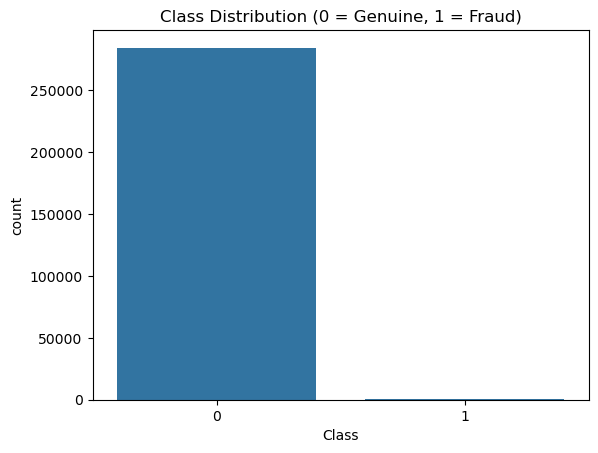

In [7]:
# Plotting Class distribution
sns.countplot(x="Class", data = df)
plt.title("Class Distribution (0 = Genuine, 1 = Fraud)")
plt.show()

In [8]:
# Preparing features and target
x = df.drop("Class", axis = 1)
y = df["Class"]

In [9]:
# Input data
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [10]:
# Output data
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [11]:
# Train-Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify=y)
print("\nTraining set size:", x_train.shape)
print("Testing set size:", x_test.shape)


Training set size: (199364, 30)
Testing set size: (85443, 30)


In [12]:
# Standard Scaling (before SMOTE)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [13]:
# Handling class imbalance using SMOTE (on scaled train data only)
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train_scaled, y_train)

In [14]:
print("Before SMOTE:\n", y_train.value_counts())
print("After SMOTE:\n", y_train_res.value_counts())

Before SMOTE:
 Class
0    199020
1       344
Name: count, dtype: int64
After SMOTE:
 Class
0    199020
1    199020
Name: count, dtype: int64


In [15]:
# Model Training (Classification Problem, since our output 'Class' is binary.)

In [16]:
# Logistic Regression Model (with SMOTE & Scaling)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(x_train_res, y_train_res)
y_pred_lr = lr_model.predict(x_test_scaled)

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("\nClassification Report - Logistic Regression:")
print(classification_report(y_test, y_pred_lr, digits=4))

Accuracy: 0.9777278419531149

Classification Report - Logistic Regression:
              precision    recall  f1-score   support

           0     0.9998    0.9779    0.9887     85295
           1     0.0645    0.8784    0.1202       148

    accuracy                         0.9777     85443
   macro avg     0.5322    0.9281    0.5545     85443
weighted avg     0.9982    0.9777    0.9872     85443



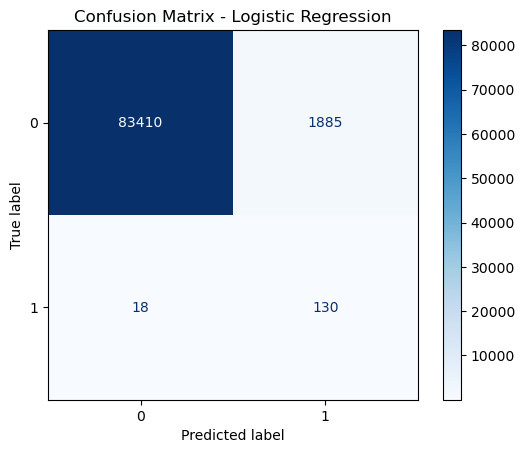

In [18]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)
disp_lr.plot(cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [ ]:
# Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42, n_jobs=-1)
rf_model.fit(x_train_res, y_train_res)
y_pred_rf = rf_model.predict(x_test_scaled)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report - Random Forest:")
print(classification_report(y_test, y_pred_lr, digits=4))